In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


# Load the enhanced anxiety dataset
data = pd.read_csv('enhanced_anxiety_dataset.csv', 
                          delimiter=',', encoding='ascii')

# Display the shape of both datasets to understand sizes
print('Enhanced Anxiety Dataset shape:', data.shape)

# It is often useful to inspect the head of the dataset
data.head()

Enhanced Anxiety Dataset shape: (11000, 19)


,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


In [151]:
# Cek info dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

In [152]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Smoking'] = le.fit_transform(data['Smoking'])
data['Dizziness'] = le.fit_transform(data['Dizziness'])
data['Recent Major Life Event'] = le.fit_transform(data['Recent Major Life Event'])

# One-Hot Encoding untuk 'Gender'
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

In [153]:
# Cek info dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Occupation                         11000 non-null  object 
 2   Sleep Hours                        11000 non-null  float64
 3   Physical Activity (hrs/week)       11000 non-null  float64
 4   Caffeine Intake (mg/day)           11000 non-null  int64  
 5   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 6   Smoking                            11000 non-null  int32  
 7   Family History of Anxiety          11000 non-null  object 
 8   Stress Level (1-10)                11000 non-null  int64  
 9   Heart Rate (bpm)                   11000 non-null  int64  
 10  Breathing Rate (breaths/min)       11000 non-null  int64  
 11  Sweating Level (1-5)               11000 non-null  int

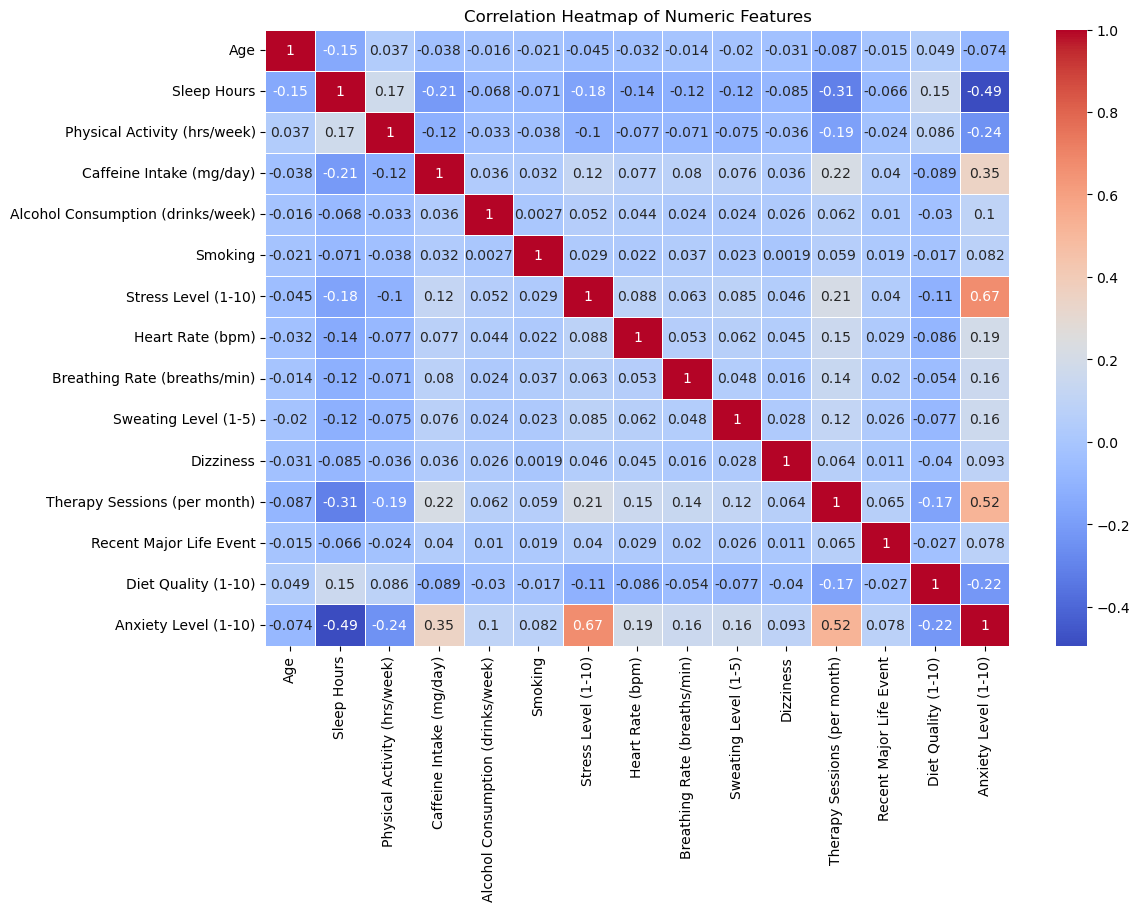

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Salin dataframe enhanced
df = data.copy()

# Ambil kolom numerik saja
numeric_df = df.select_dtypes(include=[np.number])

# Plot heatmap korelasi jika kolom numerik mencukupi
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()


In [155]:
# Cek apakah ada missing values
print(data.isnull().sum())

Age                                  0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm)                     0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Anxiety Level (1-10)                 0
Gender_Male                          0
Gender_Other                         0
dtype: int64


In [156]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k='all')  # atau pilih top k=8,7, dsb
X_new = selector.fit_transform(X, y)

selected_features = selector.get_support(indices=True)
print("Fitur terpilih:", X.columns[selected_features])


Fitur terpilih: Index(['Sleep Hours', 'Physical Activity (hrs/week)',
       'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)',
       'Stress Level (1-10)', 'Heart Rate (bpm)',
       'Breathing Rate (breaths/min)', 'Sweating Level (1-5)'],
      dtype='object')


In [166]:
from sklearn.model_selection import train_test_split

# Pilih fitur numerik yang relevan (pastikan nama kolom sama persis)
X = data[[
    "Sleep Hours",
    "Physical Activity (hrs/week)",
    "Caffeine Intake (mg/day)",
    "Alcohol Consumption (drinks/week)",
    "Stress Level (1-10)",
    "Heart Rate (bpm)",
    "Breathing Rate (breaths/min)",
    "Sweating Level (1-5)",
]]
y = data["Anxiety Level (1-10)"]

from sklearn.preprocessing import StandardScaler

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data dengan data yang sudah distandarisasi
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [158]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

# Split ulang data agar fresh
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi data (hindari informasi bocor)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Distribusi parameter yang lebih detail
param_dist = {
    'n_estimators': np.arange(200, 1201, 100),
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Model dasar
rf = RandomForestRegressor(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=200,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit model
random_search.fit(X_train_scaled, y_train)

# Model terbaik
best_model = random_search.best_estimator_

# Prediksi
y_pred = best_model.predict(X_test_scaled)

# Evaluasi
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Validasi silang
cv_r2 = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='r2')

print("===== Evaluasi Model Terbaik (Random Forest - Optimized) =====")
print(f"MAE   : {mae:.4f}")
print(f"RMSE  : {rmse:.4f}")
print(f"RMSLE : {rmsle:.4f}")
print(f"R²    : {r2:.4f}")
print(f"CV R² (mean): {cv_r2.mean():.4f} | std: {cv_r2.std():.4f}")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


===== Evaluasi Model Terbaik (Random Forest - Optimized) =====
MAE   : 0.8305
RMSE  : 1.0327
RMSLE : 0.2491
R²    : 0.7698
CV R² (mean): 0.7564 | std: 0.0149


In [169]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.model_selection import GridSearchCV

# Split ulang data agar fresh
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarisasi data (hindari informasi bocor)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Distribusi parameter yang lebih detail
param_dist = {
    'n_estimators': np.arange(200, 1201, 100),
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Model dasar
rf = RandomForestRegressor(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=200,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit model
random_search.fit(X_train_scaled, y_train)

# Ambil best_params_ dari RandomizedSearchCV
best_params = random_search.best_params_
print("Best params from RandomizedSearch:", best_params)

# Buat grid di sekitar best_params_
param_grid = {
    'n_estimators': [best_params['n_estimators'] - 100,
                     best_params['n_estimators'],
                     best_params['n_estimators'] + 100],
    'max_depth': [best_params['max_depth']] if best_params['max_depth'] is None
                 else [d for d in [best_params['max_depth'] - 10, best_params['max_depth'], best_params['max_depth'] + 10] if d is None or d >= 1],
    'min_samples_split': [v for v in [best_params['min_samples_split'] - 1,
                                      best_params['min_samples_split'],
                                      best_params['min_samples_split'] + 1] if v >= 2],
    'min_samples_leaf': [v for v in [best_params['min_samples_leaf'] - 1,
                                     best_params['min_samples_leaf'],
                                     best_params['min_samples_leaf'] + 1] if v >= 1],
    'max_features': [best_params['max_features']],
    'bootstrap': [best_params['bootstrap']]
}

# Hapus nilai negatif jika ada
for key in ['min_samples_split', 'min_samples_leaf']:
    param_grid[key] = [v for v in param_grid[key] if v > 0]

# GridSearch
grid_search = GridSearchCV(
    rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Fit model hasil GridSearch
grid_search.fit(X_train_scaled, y_train)

# Model terbaik hasil GridSearch
final_model = grid_search.best_estimator_

# Prediksi & evaluasi ulang
y_pred_final = final_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_final)
mse = mean_squared_error(y_test, y_pred_final)
rmse = np.sqrt(mse)
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred_final))
r2 = r2_score(y_test, y_pred_final)
cv_r2 = cross_val_score(final_model, X_train_scaled, y_train, cv=5, scoring='r2')

print("\n===== Evaluasi Model Finetuned (Grid Search) =====")
print(f"MAE   : {mae:.4f}")
print(f"RMSE  : {rmse:.4f}")
print(f"RMSLE : {rmsle:.4f}")
print(f"R²    : {r2:.4f}")
print(f"CV R² (mean): {cv_r2.mean():.4f} | std: {cv_r2.std():.4f}")


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best params from RandomizedSearch: {'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}
Fitting 5 folds for each of 24 candidates, totalling 120 fits

===== Evaluasi Model Finetuned (Grid Search) =====
MAE   : 0.8307
RMSE  : 1.0333
RMSLE : 0.2490
R²    : 0.7696
CV R² (mean): 0.7564 | std: 0.0150


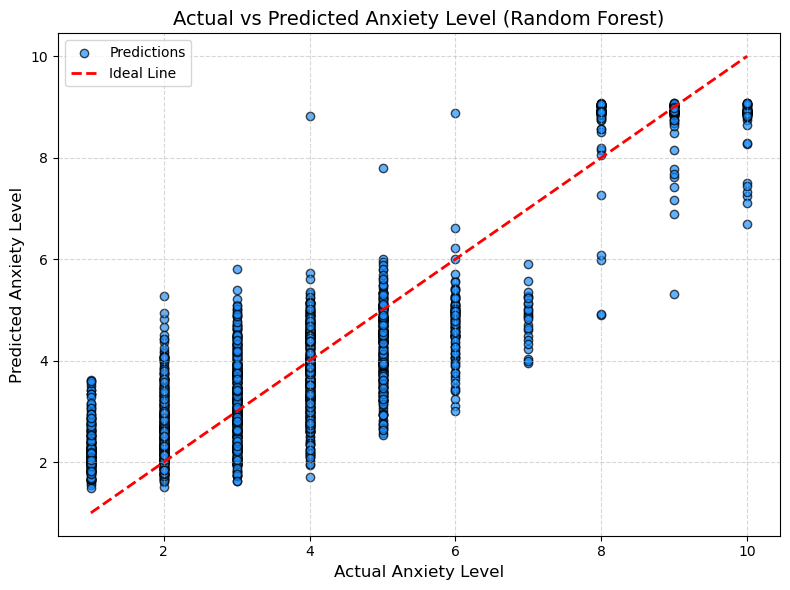

In [170]:
import matplotlib.pyplot as plt

# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_random, color='dodgerblue', edgecolor='k', alpha=0.7, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--', label='Ideal Line')
plt.xlabel("Actual Anxiety Level", fontsize=12)
plt.ylabel("Predicted Anxiety Level", fontsize=12)
plt.title("Actual vs Predicted Anxiety Level (Random Forest)", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [174]:
import joblib
joblib.dump(final_model, "final_rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

Stress Level (1-10): Semakin tinggi nilai stress level, semakin tinggi tingkat kecemasan. Untuk prediksi tinggi, gunakan nilai 10 (maksimal).

Caffeine Intake (mg/day): Dosis kafein yang tinggi dapat meningkatkan kecemasan. Pilih nilai 300 hingga 500 mg untuk meningkatkan kecemasan.

Heart Rate (bpm): Semakin tinggi detak jantung, semakin tinggi tingkat kecemasan. Untuk prediksi tinggi, pilih 100 hingga 120 bpm.

Breathing Rate (breaths/min): Percepatan pernapasan biasanya terkait dengan kecemasan. Pilih nilai 22 hingga 30 pernapasan per menit untuk meningkatkan kecemasan.

Sweating Level (1-5): Keringat berlebih sering muncul pada kondisi cemas. Untuk prediksi tinggi, pilih nilai 4 atau 5.

Sleep Hours: Semakin sedikit tidur, semakin tinggi kecemasan. Gunakan 2 hingga 4 jam tidur untuk prediksi kecemasan tinggi.

Physical Activity (hrs/week): Kurangnya aktivitas fisik cenderung meningkatkan kecemasan. Pilih 0 hingga 2 jam aktivitas fisik per minggu.

Alcohol Consumption (drinks/week): Konsumsi alkohol dapat memengaruhi tingkat kecemasan, meskipun pengaruhnya kompleks. Untuk prediksi tinggi, pilih 3 hingga 6 minuman per minggu.

In [178]:
import joblib
import numpy as np
import pandas as pd

# Load model dan scaler
model = joblib.load("final_rf_model.pkl")
scaler = joblib.load("scaler.pkl")

# Kolom sesuai urutan fitur saat training
columns = [
    "Sleep Hours",
    "Physical Activity (hrs/week)",
    "Caffeine Intake (mg/day)",
    "Alcohol Consumption (drinks/week)",
    "Stress Level (1-10)",
    "Heart Rate (bpm)",
    "Breathing Rate (breaths/min)",
    "Sweating Level (1-5)",
]

# Input dalam bentuk DataFrame
input_data = pd.DataFrame([[6, 2, 100, 0, 7, 80, 18, 3]], columns=columns)

# Transformasi & prediksi
input_scaled = scaler.transform(input_data)
prediction = model.predict(input_scaled)

print("Prediksi Anxiety Score:", prediction[0])


Prediksi Anxiety Score: 3.8895023689737385


In [180]:
import joblib
import numpy as np
import pandas as pd

# Load model dan scaler
model = joblib.load("final_rf_model.pkl")
scaler = joblib.load("scaler.pkl")

# Kolom sesuai urutan fitur saat training
columns = [
    "Sleep Hours",
    "Physical Activity (hrs/week)",
    "Caffeine Intake (mg/day)",
    "Alcohol Consumption (drinks/week)",
    "Stress Level (1-10)",
    "Heart Rate (bpm)",
    "Breathing Rate (breaths/min)",
    "Sweating Level (1-5)",
]

# Input dalam bentuk DataFrame
input_data = pd.DataFrame([[
    3,    # Sleep Hours (kurang tidur)
    0,    # Physical Activity (tidak aktif)
    400,  # Caffeine Intake (tinggi)
    5,    # Alcohol Consumption (cukup tinggi)
    10,   # Stress Level (maksimal)
    110,  # Heart Rate (tinggi)
    25,   # Breathing Rate (cepat)
    5     # Sweating Level (maksimal)
]], columns=columns)


# Transformasi & prediksi
input_scaled = scaler.transform(input_data)
prediction = model.predict(input_scaled)

print("Prediksi Anxiety Score:", prediction[0])


Prediksi Anxiety Score: 8.940097390481288
